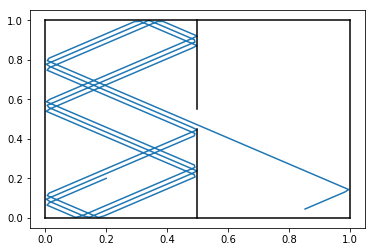

In [27]:
import matplotlib.pyplot as plt
N = 500
dim = 2

eps = 1e-15

def bounce(x, v, H0, V0, dt):
    x2 = [ x[i] + v[i]*dt for i in range(dim) ]
    v2 = v[:]
    interval = (1., -1)
    for H in H0:
        if abs(x[1] - H[0]) > eps and (x[1]-H[0])*(x2[1]-H[0]) <= 0:
            part1 = 0. if x[1] == H[0] else abs(x[1]-H[0])/abs(x2[1]-x[1])
            xtemp = x[0] + v[0]*dt*part1
            if part1 < interval[0] and H[1] <= xtemp <= H[2]:
                interval = (part1, 0)
    for V in V0:
        if abs(x[0] - V[0]) > eps and (x[0]-V[0])*(x2[0]-V[0]) <= 0:
            part1 = 0. if x[0] == V[0] else abs(x[0]-V[0])/abs(x2[0]-x[0])
            ytemp = x[1] + v[1]*dt*part1
            if part1 < interval[0] and V[1] <= ytemp <= V[2]:
                interval = (part1, 1)
    if interval[1] >= 0:
        x2 = [ x[i] + v[i]*dt*interval[0] for i in range(dim) ]
        if interval[1] == 0: v2[1] *= -1
        if interval[1] == 1: v2[0] *= -1
        x2, v2 = bounce(x2, v2, H0, V0, dt*(1-interval[0]))
    return x2, v2


H = [ [ 0., 0., 1. ], [ 1., 0., 1. ] ]#, [0.1719, 0.1, 0.4 ], [0.65648, 0.2, 0.3], [0.45, 0.5, 0.75]]
V = [ [ 0., 0., 1. ], [ 1., 0., 1. ], [0.5, 0, 0.45], [0.5, 0.55, 1]]


x = [ 0.2, 0.2 ]
v = [ -0.18693, -0.1231 ]
dt = 0.1

X, Y = [ x[0] ], [ x[1] ]
for i in range(N):
    #print "Step", i
    x, v = bounce(x, v, H, V, dt)
    X.append(x[0])
    Y.append(x[1])

plt.plot(X, Y)
for hor in H:
    plt.plot( [ hor[1], hor[2] ], [ hor[0], hor[0] ], color = 'black' )
for ver in V:
    plt.plot( [ ver[0], ver[0] ], [ ver[1], ver[2] ], color='black' )
    
plt.show()

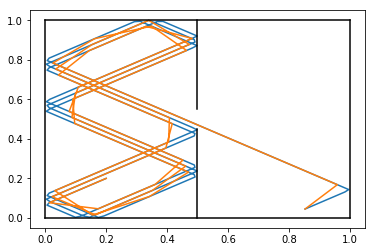

In [28]:
import matplotlib.pyplot as plt
N = 50
dim = 2

eps = 1e-15

def bounce(x, v, H0, V0, dt):
    x2 = [ x[i] + v[i]*dt for i in range(dim) ]
    v2 = v[:]
    interval = (1., -1)
    for H in H0:
        if abs(x[1] - H[0]) > eps and (x[1]-H[0])*(x2[1]-H[0]) <= 0:
            part1 = 0. if x[1] == H[0] else abs(x[1]-H[0])/abs(x2[1]-x[1])
            xtemp = x[0] + v[0]*dt*part1
            if part1 < interval[0] and H[1] <= xtemp <= H[2]:
                interval = (part1, 0)
    for V in V0:
        if abs(x[0] - V[0]) > eps and (x[0]-V[0])*(x2[0]-V[0]) <= 0:
            part1 = 0. if x[0] == V[0] else abs(x[0]-V[0])/abs(x2[0]-x[0])
            ytemp = x[1] + v[1]*dt*part1
            if part1 < interval[0] and V[1] <= ytemp <= V[2]:
                interval = (part1, 1)
    if interval[1] >= 0:
        x2 = [ x[i] + v[i]*dt*interval[0] for i in range(dim) ]
        if interval[1] == 0: v2[1] *= -1
        if interval[1] == 1: v2[0] *= -1
        x2, v2 = bounce(x2, v2, H0, V0, dt*(1-interval[0]))
    return x2, v2

x = [ 0.2, 0.2 ]
v = [ -0.18693, -0.1231 ]
dt = 1.0


plt.plot(X, Y)
X, Y = [ x[0] ], [ x[1] ]
for i in range(N):
    #print "Step", i
    x, v = bounce(x, v, H, V, dt)
    X.append(x[0])
    Y.append(x[1])

plt.plot(X, Y)
for hor in H:
    plt.plot( [ hor[1], hor[2] ], [ hor[0], hor[0] ], color = 'black' )
for ver in V:
    plt.plot( [ ver[0], ver[0] ], [ ver[1], ver[2] ], color='black' )
    
plt.show()